<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="GL-2.png">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Rain prediction data)

The dataset consists of various factors like temperature, humidity, a wind speed that are important in predicting the rainfall in the Indian subcontinent. 

**Temperature_min**: Minimum temperature for the day

**Temperature_max**: Maximum temperature for the day

**WindSpeedAt3am**: Today's speed of the wind at 3 am 

**WindSpeedAt10am**: Today's speed of the wind at 10 am

**WindSpeedAt6pm**: Today's speed of the wind at 6 pm 

**HumidityLevelAt10am**: Today's humidity level at 10 am

**HumidityAt6pm**: Today's humidity level at 6 pm

**PressureAt10am**: Today's atmospheric pressure at 10 am

**PressureAt6pm**: Today's atmospheric pressure at 6 pm

**TemperatureAt10am**: Today's temperature at 10 am

**TemperatureAt6pm**: Today's temperature at 6 pm

**WillRainTomorrow?**: Will there be rain tomorrow? (Yes or No) (target/dependent variable)

Use different dimension reduction techniques to transform the dataset into the lower dimension.

## Table of Content

1. **[Exploratory Data Analysis](#eda)**
2. **[Principal Component Analysis (PCA)](#pca)**
3. **[Linear Discriminant Analysis (LDA)](#lda)**

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Load the csv file

In [2]:
df=pd.read_csv("Ind_Climate_RainPred.csv")
df.head()

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm,WillRainTomorrow?
0,20.3,30.7,32,6,17,110,72,1025.2,1015.4,26.6,40.4,No
1,30.0,33.3,33,10,20,70,35,1032.6,1035.4,26.6,39.3,No
2,23.5,26.9,24,14,20,98,63,1025.5,1026.0,29.8,34.6,Yes
3,25.5,26.9,45,20,30,82,59,1019.3,1016.9,24.2,30.8,No
4,33.5,39.3,33,4,12,94,49,1027.3,1022.2,33.6,43.6,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10464 entries, 0 to 10463
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature_min      10464 non-null  float64
 1   Temperature_max      10464 non-null  float64
 2   WindSpeedAt3am       10464 non-null  int64  
 3   WindSpeedAt10am      10464 non-null  int64  
 4   WindSpeedAt6pm       10464 non-null  int64  
 5   HumidityLevelAt10am  10464 non-null  int64  
 6   HumidityAt6pm        10464 non-null  int64  
 7   PressureAt10am       10464 non-null  float64
 8   PressureAt6pm        10464 non-null  float64
 9   TemperatureAt10am    10464 non-null  float64
 10  TemperatureAt6pm     10464 non-null  float64
 11  WillRainTomorrow?    10464 non-null  object 
dtypes: float64(6), int64(5), object(1)
memory usage: 981.1+ KB



### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Check the datatype of all the variables in the dataset. If the datatype is not as per the definition, do the needful.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
df.dtypes

Temperature_min        float64
Temperature_max        float64
WindSpeedAt3am           int64
WindSpeedAt10am          int64
WindSpeedAt6pm           int64
HumidityLevelAt10am      int64
HumidityAt6pm            int64
PressureAt10am         float64
PressureAt6pm          float64
TemperatureAt10am      float64
TemperatureAt6pm       float64
WillRainTomorrow?       object
dtype: object

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the statistical summary of all the numerical variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
df.describe()

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm
count,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000
mean,26.308964,30.309939,41.391820,15.379683,20.394209,82.210627,60.992928,1023.362481,1020.702332,30.713083,36.218626
std,6.843041,7.424327,14.437279,7.449217,7.847386,18.557838,22.737736,7.536385,7.433202,6.752840,7.723442
min,7.200000,13.200000,9.000000,2.000000,2.000000,11.000000,4.000000,993.700000,991.900000,10.300000,16.700000
25%,21.300000,24.600000,31.000000,10.000000,15.000000,70.000000,44.000000,1018.400000,1015.600000,25.800000,30.600000
50%,26.200000,29.500000,39.000000,14.000000,20.000000,85.000000,59.000000,1023.400000,1020.700000,30.800000,35.600000
75%,31.500000,35.600000,49.000000,20.000000,25.000000,98.000000,77.000000,1028.600000,1025.700000,35.400000,41.400000
max,47.300000,55.800000,131.000000,58.000000,63.000000,110.000000,110.000000,1048.900000,1046.400000,56.300000,63.300000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Is the target variable highly imbalanced? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

WillRainTomorrow is the target variable.

In [8]:
df["WillRainTomorrow?"].value_counts()

No     5464
Yes    5000
Name: WillRainTomorrow?, dtype: int64

The target variable is not imbalanced

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Check if any missing values are present in the data. If yes, do the needful.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# write your code here
df.isnull().sum()

Temperature_min        0
Temperature_max        0
WindSpeedAt3am         0
WindSpeedAt10am        0
WindSpeedAt6pm         0
HumidityLevelAt10am    0
HumidityAt6pm          0
PressureAt10am         0
PressureAt6pm          0
TemperatureAt10am      0
TemperatureAt6pm       0
WillRainTomorrow?      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of all the independent variables and identify the type of skewness.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

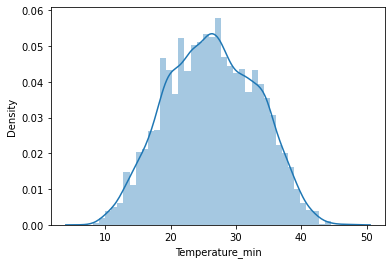

C:\Users\swathy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


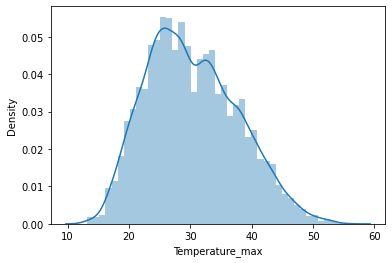

C:\Users\swathy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


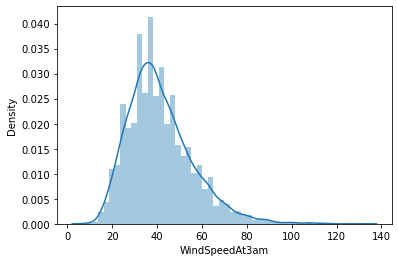

C:\Users\swathy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


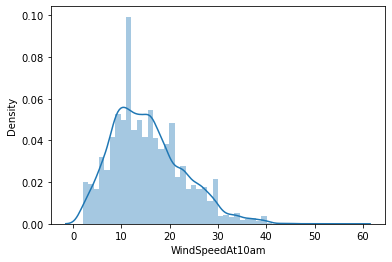

C:\Users\swathy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


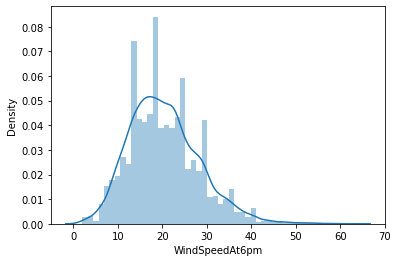

C:\Users\swathy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


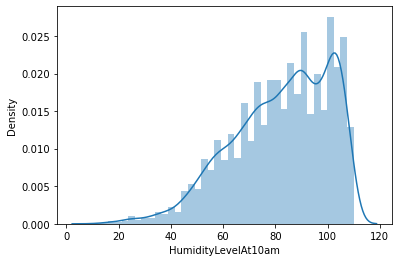

C:\Users\swathy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


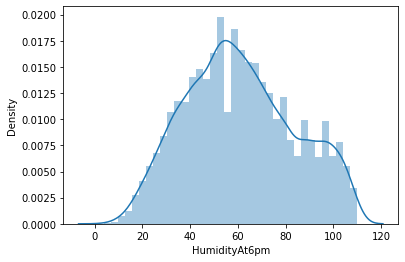

C:\Users\swathy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


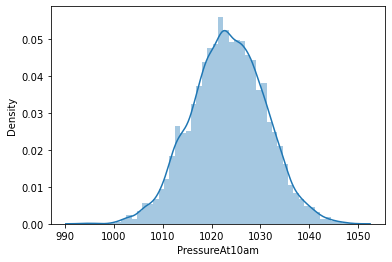

C:\Users\swathy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


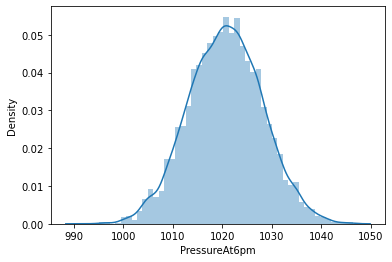

C:\Users\swathy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


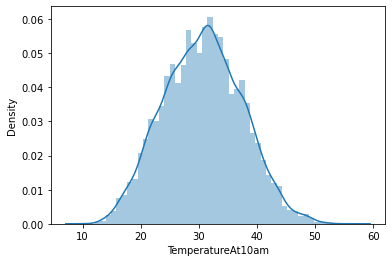

C:\Users\swathy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


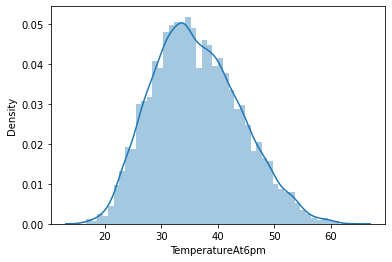

In [12]:
dfn=df.select_dtypes(include="number")
for col in dfn.columns:
    sns.distplot(dfn[col])
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Transform the independent variables such that each variable will have a mean zero and standard deviation of 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
y=df["WillRainTomorrow?"]
X=df.drop("WillRainTomorrow?",axis=1)

In [15]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xs=ss.fit_transform(X)

<a id="pca"> </a>
## 2. Principal Component Analysis (PCA)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the covariance matrix of the standardized data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
cov_mat=np.cov(Xs)

In [23]:
cov_mat.shape

(10464, 10464)

In [25]:
cov_mat=np.cov(Xs.T)

In [26]:
cov_mat.shape

(11, 11)

In [18]:
cov_mat[:3]

array([[ 0.64092178, -0.10844643,  0.21088711, ..., -0.11707971,
         0.23917022,  0.06465639],
       [-0.10844643,  0.89426102,  0.1576168 , ...,  0.05396696,
        -0.23797188,  0.19163788],
       [ 0.21088711,  0.1576168 ,  0.32030063, ...,  0.12459125,
        -0.07509555, -0.05941324]])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Compute the eigenvalues and eigenvectors of the above covariance matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
eigenvalue,eigenvector=np.linalg.eig(cov_mat)


In [28]:
eigenvalue=eigenvalue.tolist()
eigenvalue

[4.37827342476177,
 2.205376114285331,
 1.4028950957281165,
 0.9390912080234743,
 0.6918597738714433,
 0.38762837994450317,
 0.34242383692492656,
 0.2432917452762679,
 0.11262274162621201,
 0.137482005810032,
 0.1601069974600569]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the Kaiser criterion to identify the optimal number of principal components.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

we will select 3 components with eigen value >= 1.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. How many minimum principal components are required to explain at least 80% of the variation in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
percent_var=[]
for i in eigenvalue:
    var += i*100/11
    percent_var.append(var)

In [34]:
percent_var

[41.25800383838024,
 61.30687760461052,
 74.06046938395704,
 82.59766218417045,
 88.88729649209266,
 92.4111908552245,
 95.5241348272693,
 97.73587796614446,
 98.75972107183729,
 100.00955748829213,
 101.46507564701992]

we  need 4 components to take care of 80% of variation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Create a dataframe of the transformed data with 4 principal components.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
eig_vec4=eigenvector[:,0:4]
X_pca4=np.dot(Xs,eig_vec4)
X_pca4.shape

(10464, 4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Visualize the rain prediction data by transforming it to 2-dimensions using the python library. Also, display the classes of the target variables with different colors.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(Xs)

X_pca=pd.DataFrame(X_pca,columns=["PC1","PC2"])

In [40]:
X_pca.head()

,PC1,PC2
0,-1.193577,-0.344281
1,-0.417268,-2.300435
2,-1.374390,-0.522208
3,-0.166105,1.620767
4,0.528825,-2.208708


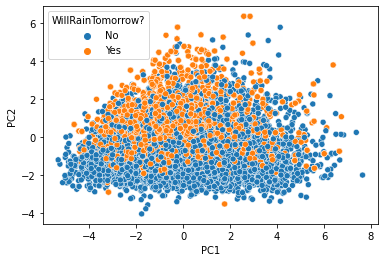

In [42]:
sns.scatterplot(x="PC1",y="PC2",hue=y,data=X_pca)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Split the dataset of the 11 standardized features into the train and test sets of proportion 70:30.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xs,y,test_size=.30,random_state=42)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Reduce the number of features in the train and test sets to 3 using the python library.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
pca=PCA(n_components=3)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Write a generalized function that builds the random forest classification algorithm and returns the accuracy of the algorithm on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

rfc=RandomForestClassifier()

rfc.fit(X_train_pca,y_train)
y_train_pred=rfc.predict(X_train_pca)
y_test_pred=rfc.predict(X_test_pca)

# to find the probabilities for ROC AUC score
y_train_prob=rfc.predict_proba(X_train_pca)[:,1]
y_test_prob=rfc.predict_proba(X_test_pca)[:,1]
print("Train classification report ",classification_report(y_train,y_train_pred))
print("Train accuracy score ",accuracy_score(y_train,y_train_pred))
print("Train confusion matrix ",confusion_matrix(y_train,y_train_pred))
print("Train ROC AUC Score is ",roc_auc_score(y_train,y_train_prob))

print(" ")

      
print("Test classification report ",classification_report(y_test,y_test_pred))
print("Test  accuracy score ",accuracy_score(y_test,y_test_pred))
print("Test  confusion matrix ",confusion_matrix(y_test,y_test_pred))
print("Test ROC AUC Score is ",roc_auc_score(y_test,y_test_prob))

Train classification report                precision    recall  f1-score   support

          No       1.00      1.00      1.00      3816
         Yes       1.00      1.00      1.00      3508

    accuracy                           1.00      7324
   macro avg       1.00      1.00      1.00      7324
weighted avg       1.00      1.00      1.00      7324

Train accuracy score  1.0
Train confusion matrix  [[3816    0]
 [   0 3508]]
Train ROC AUC Score is  1.0
 
Test classification report                precision    recall  f1-score   support

          No       0.97      0.88      0.92      1648
         Yes       0.88      0.97      0.92      1492

    accuracy                           0.92      3140
   macro avg       0.92      0.92      0.92      3140
weighted avg       0.93      0.92      0.92      3140

Test  accuracy score  0.9213375796178344
Test  confusion matrix  [[1442  206]
 [  41 1451]]
Test ROC AUC Score is  0.9827024470314167


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a random forest model on the original data (without PCA transformation) and find the accuracy of the model on the test data. Also, calculate the time required to execute the code.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
%%time
rfc=RandomForestClassifier()

rfc.fit(X_train,y_train)
y_train_pred=rfc.predict(X_train)
y_test_pred=rfc.predict(X_test)

# to find the probabilities for ROC AUC score
y_train_prob=rfc.predict_proba(X_train)[:,1]
y_test_prob=rfc.predict_proba(X_test)[:,1]
print("Train classification report ",classification_report(y_train,y_train_pred))
print("Train accuracy score ",accuracy_score(y_train,y_train_pred))
print("Train confusion matrix ",confusion_matrix(y_train,y_train_pred))
print("Train ROC AUC Score is ",roc_auc_score(y_train,y_train_prob))

print(" ")

      
print("Test classification report ",classification_report(y_test,y_test_pred))
print("Test  accuracy score ",accuracy_score(y_test,y_test_pred))
print("Test  confusion matrix ",confusion_matrix(y_test,y_test_pred))
print("Test ROC AUC Score is ",roc_auc_score(y_test,y_test_prob))

Train classification report                precision    recall  f1-score   support

          No       1.00      1.00      1.00      3816
         Yes       1.00      1.00      1.00      3508

    accuracy                           1.00      7324
   macro avg       1.00      1.00      1.00      7324
weighted avg       1.00      1.00      1.00      7324

Train accuracy score  1.0
Train confusion matrix  [[3816    0]
 [   0 3508]]
Train ROC AUC Score is  1.0
 
Test classification report                precision    recall  f1-score   support

          No       0.98      0.92      0.95      1648
         Yes       0.92      0.98      0.95      1492

    accuracy                           0.95      3140
   macro avg       0.95      0.95      0.95      3140
weighted avg       0.95      0.95      0.95      3140

Test  accuracy score  0.95
Test  confusion matrix  [[1522  126]
 [  31 1461]]
Test ROC AUC Score is  0.9899215720086416
CPU times: total: 1.14 s
Wall time: 1.13 s


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Build a random forest model on the dataset transformed using PCA and find the accuracy of the model on the test data. Also, calculate the time required to execute the code.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
pca=PCA(n_components=4)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [55]:
%%time
rfc=RandomForestClassifier()

rfc.fit(X_train,y_train)
y_train_pred=rfc.predict(X_train)
y_test_pred=rfc.predict(X_test)

# to find the probabilities for ROC AUC score
y_train_prob=rfc.predict_proba(X_train)[:,1]
y_test_prob=rfc.predict_proba(X_test)[:,1]
print("Train classification report ",classification_report(y_train,y_train_pred))
print("Train accuracy score ",accuracy_score(y_train,y_train_pred))
print("Train confusion matrix ",confusion_matrix(y_train,y_train_pred))
print("Train ROC AUC Score is ",roc_auc_score(y_train,y_train_prob))

print(" ")

      
print("Test classification report ",classification_report(y_test,y_test_pred))
print("Test  accuracy score ",accuracy_score(y_test,y_test_pred))
print("Test  confusion matrix ",confusion_matrix(y_test,y_test_pred))
print("Test ROC AUC Score is ",roc_auc_score(y_test,y_test_prob))

Train classification report                precision    recall  f1-score   support

          No       1.00      1.00      1.00      3816
         Yes       1.00      1.00      1.00      3508

    accuracy                           1.00      7324
   macro avg       1.00      1.00      1.00      7324
weighted avg       1.00      1.00      1.00      7324

Train accuracy score  0.9998634625887494
Train confusion matrix  [[3815    1]
 [   0 3508]]
Train ROC AUC Score is  1.0
 
Test classification report                precision    recall  f1-score   support

          No       0.98      0.92      0.95      1648
         Yes       0.92      0.98      0.95      1492

    accuracy                           0.95      3140
   macro avg       0.95      0.95      0.95      3140
weighted avg       0.95      0.95      0.95      3140

Test  accuracy score  0.9484076433121019
Test  confusion matrix  [[1518  130]
 [  32 1460]]
Test ROC AUC Score is  0.9897304230979463
CPU times: total: 1.11 s
Wall tim

<a id="lda"> </a>
## 3. Linear Discriminant Analysis (LDA)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Project the train and test sets (data without PCA transformation) onto the 1-dimensional vector that maximizes the separation between the classes of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()

X_train_lda=lda.fit_transform(X_train,y_train)
X_test_lda=lda.transform(X_test)   # 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Run the random forest classifier on the LDA transformed data and find the model accuracy on the test set. Also, calculate the time required to execute the code.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
%%time
rfc=RandomForestClassifier()

rfc.fit(X_train_lda,y_train)
y_train_pred=rfc.predict(X_train_lda)
y_test_pred=rfc.predict(X_test_lda)

# to find the probabilities for ROC AUC score
y_train_prob=rfc.predict_proba(X_train_lda)[:,1]
y_test_prob=rfc.predict_proba(X_test_lda)[:,1]
print("Train classification report ",classification_report(y_train,y_train_pred))
print("Train accuracy score ",accuracy_score(y_train,y_train_pred))
print("Train confusion matrix ",confusion_matrix(y_train,y_train_pred))
print("Train ROC AUC Score is ",roc_auc_score(y_train,y_train_prob))

print(" ")

      
print("Test classification report ",classification_report(y_test,y_test_pred))
print("Test  accuracy score ",accuracy_score(y_test,y_test_pred))
print("Test  confusion matrix ",confusion_matrix(y_test,y_test_pred))
print("Test ROC AUC Score is ",roc_auc_score(y_test,y_test_prob))

Train classification report                precision    recall  f1-score   support

          No       1.00      1.00      1.00      3816
         Yes       1.00      1.00      1.00      3508

    accuracy                           1.00      7324
   macro avg       1.00      1.00      1.00      7324
weighted avg       1.00      1.00      1.00      7324

Train accuracy score  0.9994538503549972
Train confusion matrix  [[3813    3]
 [   1 3507]]
Train ROC AUC Score is  0.9999996638411395
 
Test classification report                precision    recall  f1-score   support

          No       0.97      0.86      0.91      1648
         Yes       0.86      0.97      0.91      1492

    accuracy                           0.91      3140
   macro avg       0.92      0.92      0.91      3140
weighted avg       0.92      0.91      0.91      3140

Test  accuracy score  0.9136942675159235
Test  confusion matrix  [[1421  227]
 [  44 1448]]
Test ROC AUC Score is  0.9349857817746428
CPU times: total: 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Which of the above methods is more efficient in reducing the dimension of the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>